In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split, GridSearchCV
folder_path = "datasets" 
excel_files = [f for f in os.listdir(folder_path) if f.endswith(".xlsx")]
excel_files

['dataset4.xlsx',
 'dataset5.xlsx',
 'dataset6.xlsx',
 'dataset7.xlsx',
 'dataset8.xlsx',
 'dataset9.xlsx',
 'dataset_1_2_3_combined.xlsx']

In [3]:
dataframes = {}
for file in excel_files:
    file_path = os.path.join(folder_path, file)
    dataframes[file] = pd.read_excel(file_path)
    print(f"Loaded {file} with shape {dataframes[file].shape}")
combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df.to_excel('dataset1.xlsx',index=False)

Loaded dataset4.xlsx with shape (500, 8)
Loaded dataset5.xlsx with shape (200, 8)
Loaded dataset6.xlsx with shape (200, 8)
Loaded dataset7.xlsx with shape (200, 8)
Loaded dataset8.xlsx with shape (200, 8)
Loaded dataset9.xlsx with shape (200, 8)
Loaded dataset_1_2_3_combined.xlsx with shape (1674, 8)


In [4]:
combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
combined_df['length_of_transcript'] = combined_df['Transcript'].apply(lambda x: len(x))
combined_df

C:\Users\Rishy\AppData\Local\Temp\ipykernel_10308\1465236243.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  combined_df = combined_df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript
0,uppaup1,alice smith,software engineer,here's a simulated interview for a software en...,here's a sample resume for alice smith:\n\n**a...,rejected,unsatisfactory references or background check.,here is a comprehensive job description for a ...,3342
1,uppaup2,hank brown,software engineer,here's a simulated interview for a software en...,"here's a resume for hank brown, a selected can...",selected,growth mindset and adaptability.,here is a job description for a software engin...,5201
2,uppaup3,bob jones,data scientist,here's a simulated interview for a data scient...,"here's a sample resume for bob jones, who appl...",rejected,inadequate communication or interpersonal skills.,here is a comprehensive job description for a ...,2977
3,uppaup4,bob miller,software engineer,here's a simulated interview for a software en...,"here's a sample resume for bob miller, a softw...",selected,strong cultural fit.,here is a sample job description for a softwar...,4331
4,uppaup5,ivy jones,data engineer,here's a simulated interview for a data engine...,here's a sample resume for ivy jones:\n\n**ivy...,rejected,lack of relevant skills or experience.,here is a sample job description for a data en...,3527
...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,here's a realistic interview transcript for th...,ananya bansal\ncontact information:\n\n* phone...,select,experience gap,\n we are seeking a qualified data engi...,4858
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information:\n\n* email: [...,reject,business acumen,\n we are seeking a qualified product m...,4667
3171,harska507,harshitha kapoor,ui engineer,"interviewer: hi harshitha, thanks for coming i...",harshitha kapoor\nui engineer\n\ncontact infor...,select,cultural fit,\n we are seeking a qualified ui engine...,5600
3172,kabich225,kabir chopra,software engineer,here's a realistic interview transcript for ka...,kabir chopra\ncontact information:\n\n* email:...,reject,technical knowledge,\n we are seeking a qualified software ...,5222


In [5]:
combined_df['decision'] = combined_df['decision'].replace({
    'reject': 'rejected',
    'select': 'selected'
})
result = combined_df[['length_of_transcript', 'decision']].groupby('decision').mean()
print(result)

          length_of_transcript
decision                      
rejected           3925.531386
selected           4657.431310


In [6]:
combined_df['num_words_in_transcript'] = combined_df['Transcript'].apply(lambda x: len(str(x).split()))
combined_df[['num_words_in_transcript','decision','Role']].groupby(['Role','decision']).agg({'mean','median','std'})

num_words_in_transcript              \
                                                          std        mean   
Role                         decision                                       
ai engineer                  rejected               18.212633  567.200000   
                             selected              204.121419  659.125000   
business analyst             rejected              110.323615  616.400000   
                             selected               54.802980  693.833333   
cloud architect              rejected               76.906870  587.000000   
                             selected               19.670197  802.250000   
content writer               rejected               61.554854  529.000000   
                             selected               30.405592  684.500000   
cybersecurity specialist     rejected              123.835375  636.000000   
                             selected               77.929455  704.000000   
data analyst                 rejected              110.356261  677.571429   
                             selected              109.459986  767.414062   
data engineer                rejected              119.032443  638.782443   
                             selected              128.361485  743.751055   
data scientist               rejected              114.073092  649.795222   
                             selected              133.971428  735.020979   
database administrator       rejected               73.432509  554.333333   
                             selected               87.793887  726.833333   
devops engineer              rejected               61.727223  601.750000   
                             selected               49.273510  695.666667   
digital marketing specialist rejected               43.657760  639.000000   
                             selected               72.875083  701.444444   
game developer               rejected              179.199144  447.333333   
                             selected              311.369020  444.000000   
graphic designer             rejected               61.207930  541.125000   
                             selected               63.439510  683.714286   
hr specialist                rejected               66.817413  657.166667   
                             selected               94.219779  745.833333   
machine learning engineer    rejected              100.349390  654.000000   
                             selected               72.034053  817.285714   
mobile app developer         rejected               88.803153  621.000000   
                             selected               11.372481  649.333333   
network engineer             rejected               92.458699  553.888889   
                             selected               60.419171  766.857143   
product manager              rejected              113.258956  629.392996   
                             selected              128.642947  750.465863   
project manager              rejected               92.922439  695.833333   
                             selected               82.964084  739.843750   
software developer           rejected              126.307029  674.461538   
                             selected               85.288800  693.555556   
software engineer            rejected              151.507240  626.550562   
                             selected              145.155873  729.173585   
system administrator         rejected               48.280431  559.000000   
                             selected                7.778175  761.500000   
ui designer                  rejected              124.724961  707.649573   
                             selected              108.505000  770.715596   
ui engineer                  rejected              106.778295  573.207143   
                             selected              161.257155  698.280576   
ui/ux designer               rejected               65.199693  494.000000   
                             selec


TF-IDF Features for Transcripts:
   000  00f   02  030   05   08  085   10  100  1000  ...  zones  zookeeper  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0  ...    0.0        0.0   

   zoom  zooming  zoya  zoyas  zscore  λw1  λw22  πr2  
0   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
1   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
2   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
3   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  
4   0.0      0.0   0.0    0.0     0.0  0.0   0.0  0.0  

[5 rows x 11476 columns]

TF-IDF Features for Job Descriptions:
   000  00f   02  030   05   08  085   10  100  1000  ...  zones  zookeeper  \
0  0.0  0.0

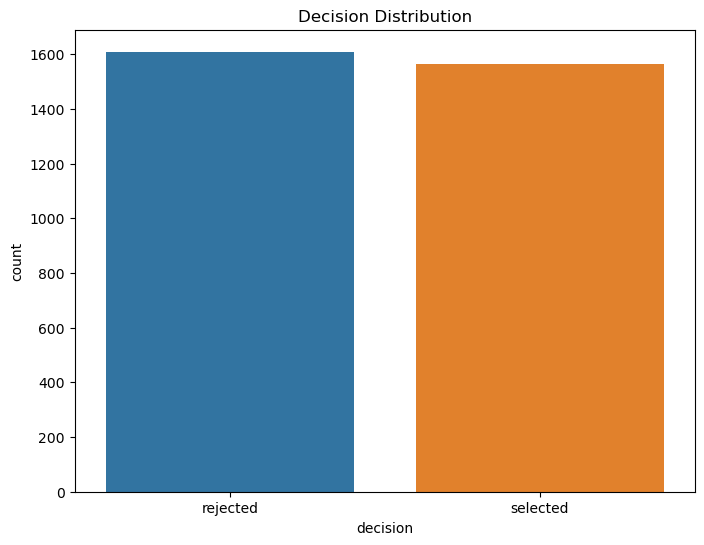

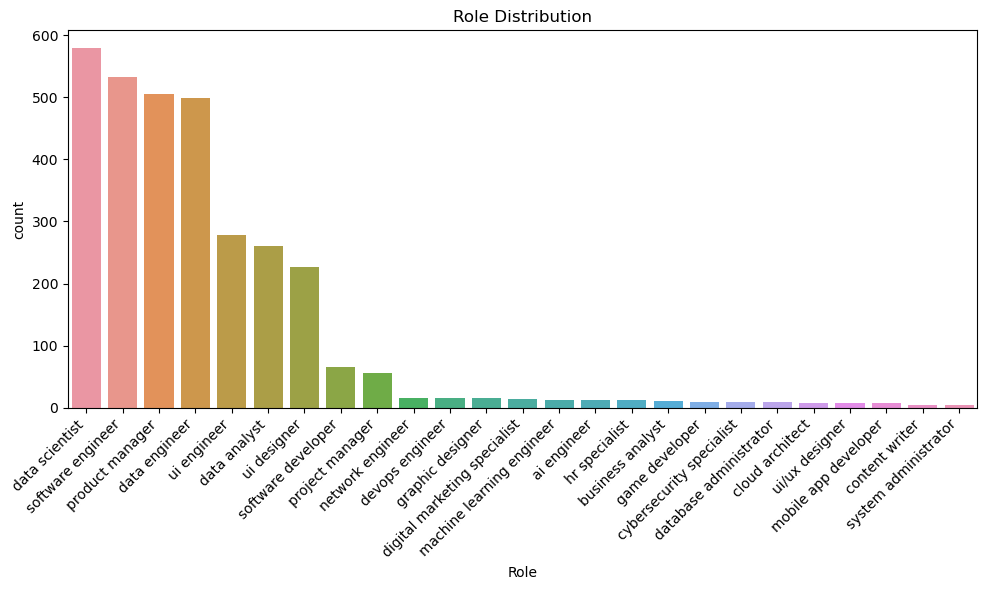

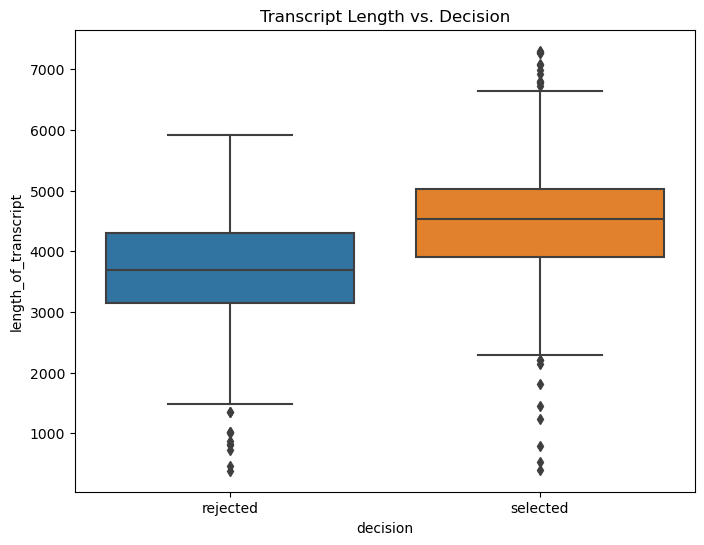

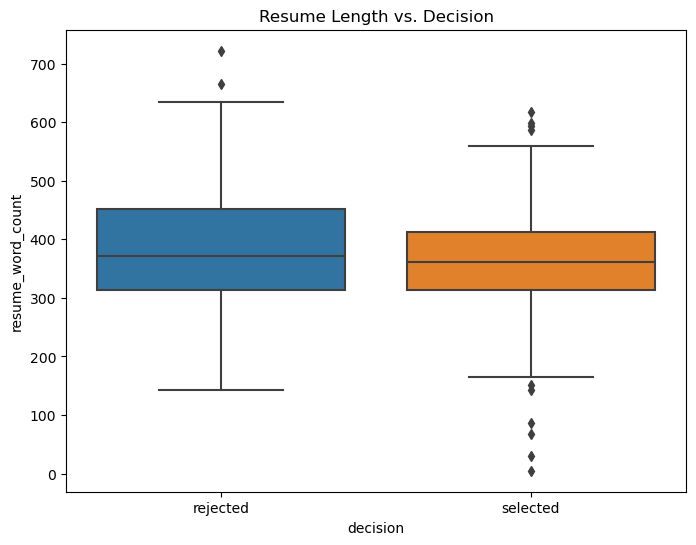

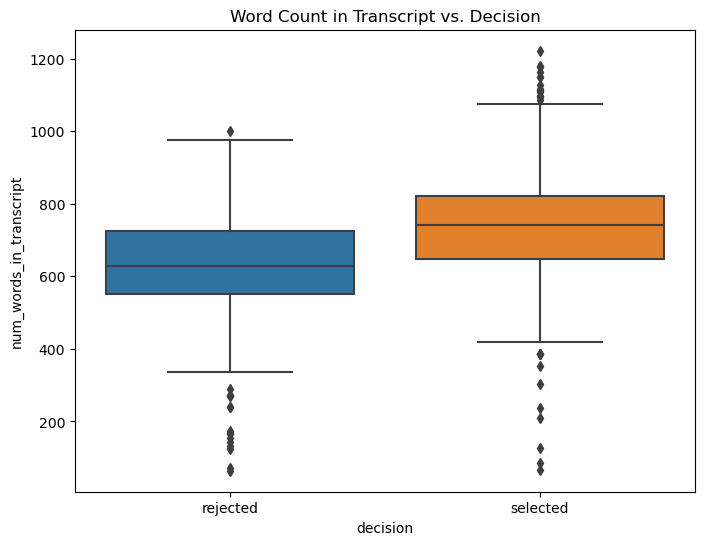

No data available for Selected Candidates top words.


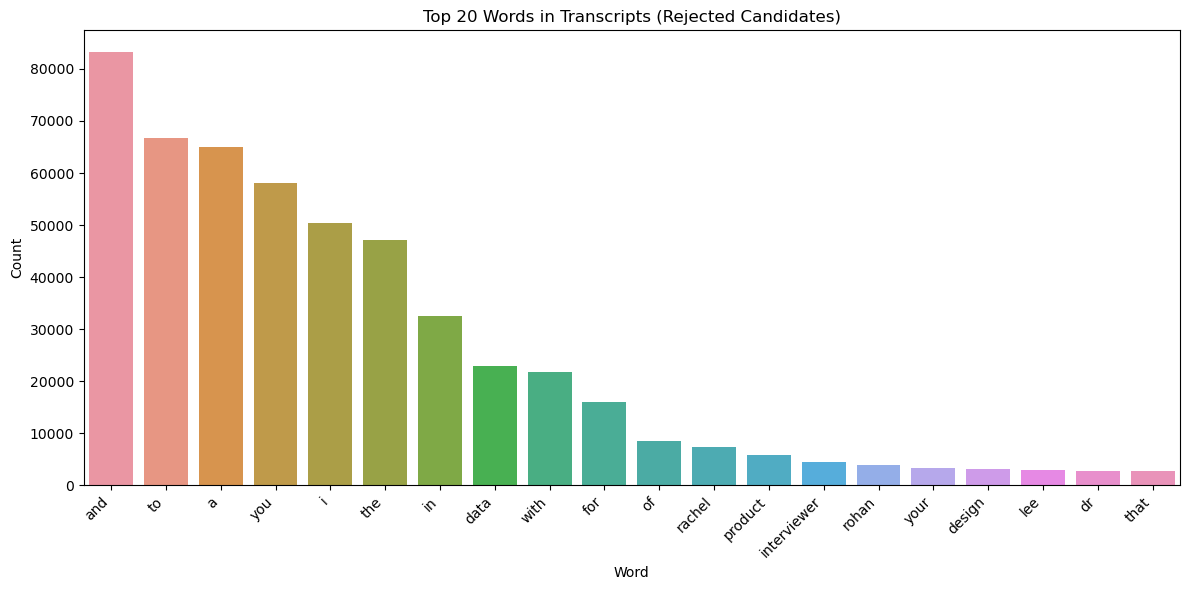

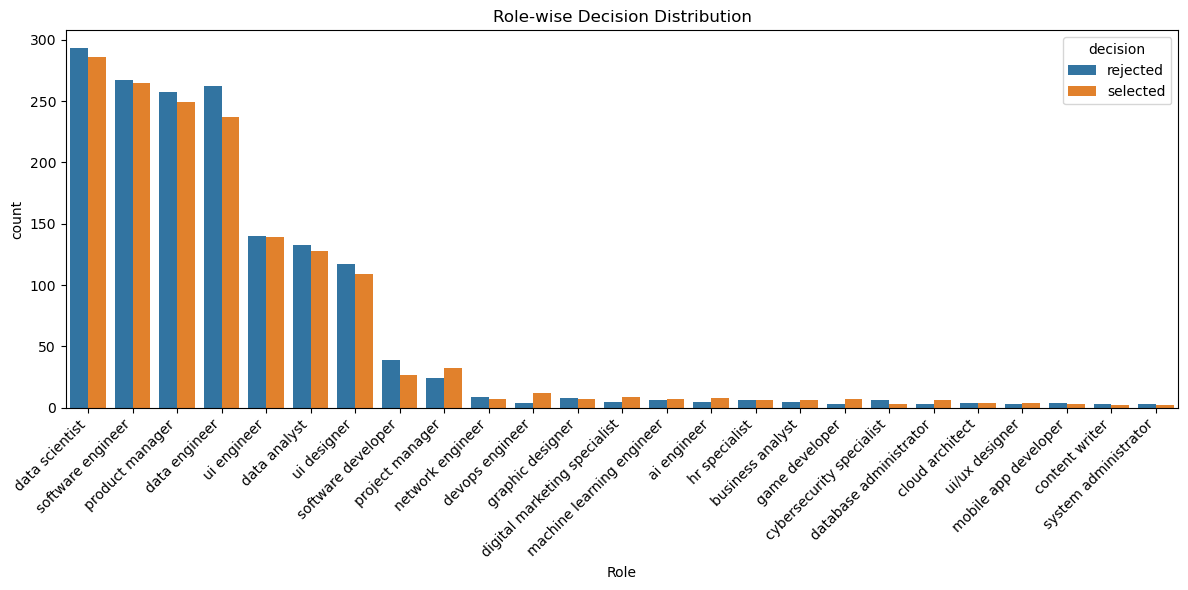

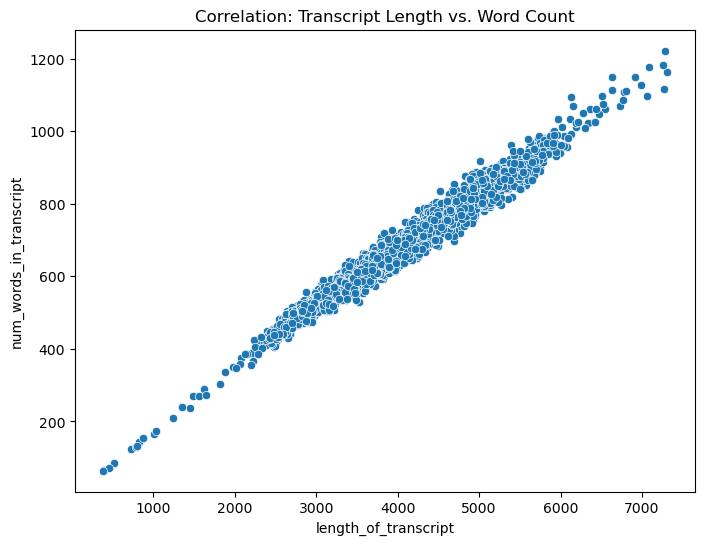


Original DataFrame with additional features:
        ID         Name               Role  \
0  uppaup1  alice smith  software engineer   
1  uppaup2   hank brown  software engineer   
2  uppaup3    bob jones     data scientist   
3  uppaup4   bob miller  software engineer   
4  uppaup5    ivy jones      data engineer   

                                          Transcript  \
0  heres a simulated interview for a software eng...   
1  heres a simulated interview for a software eng...   
2  heres a simulated interview for a data scienti...   
3  heres a simulated interview for a software eng...   
4  heres a simulated interview for a data enginee...   

                                              Resume  decision  \
0  heres a sample resume for alice smith\n\nalice...  rejected   
1  heres a resume for hank brown a selected candi...  selected   
2  heres a sample resume for bob jones who applie...  rejected   
3  heres a sample resume for bob miller a softwar...  selected   
4  heres a

In [7]:
combined_df.to_excel('datas1.xlsx',index=False)
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_excel("datas1.xlsx")
def clean_text(text):
    if isinstance(text, str):  # handle potential NaN values
        text = re.sub(r'[^\w\s]', '', text).lower()  # remove punctuation and lowercase
        return text
    else:
        return ""
for col in ['Transcript', 'Resume', 'Job Description', 'Reason for decision']:
    df[col] = df[col].apply(clean_text)
    
#Text Length and Word Count
df['length_of_transcript'] = df['Transcript'].str.len()
df['num_words_in_transcript'] = df['Transcript'].str.split().str.len()
df['resume_word_count'] = df['Resume'].str.split().str.len()

#Common Words (in transcripts)
def common_words(text, n=10):
    words = text.split()
    return Counter(words).most_common(n)

df['top_transcript_words'] = df['Transcript'].apply(lambda x: common_words(x))

#TF-IDF for Text Data (Transcript and Job Description)
tfidf = TfidfVectorizer(stop_words='english')

combined_text_data = df['Transcript'].tolist() + df['Job Description'].tolist()
tfidf.fit(combined_text_data)

transcript_tfidf = tfidf.transform(df['Transcript'])
job_desc_tfidf = tfidf.transform(df['Job Description'])

tfidf_df_transcript = pd.DataFrame(transcript_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_df_job_desc = pd.DataFrame(job_desc_tfidf.toarray(), columns=tfidf.get_feature_names_out())

print("\nTF-IDF Features for Transcripts:")
print(tfidf_df_transcript.head())

print("\nTF-IDF Features for Job Descriptions:")
print(tfidf_df_job_desc.head())

#EDA

plt.figure(figsize=(8, 6))
sns.countplot(x='decision', data=df)
plt.title('Decision Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Role', data=df, order=df['Role'].value_counts().index)  # sort by count
plt.xticks(rotation=45, ha='right')
plt.title('Role Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='length_of_transcript', data=df)
plt.title('Transcript Length vs. Decision')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='resume_word_count', data=df)
plt.title('Resume Length vs. Decision')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='decision', y='num_words_in_transcript', data=df)
plt.title('Word Count in Transcript vs. Decision')
plt.show()

# 6. Top Words in Transcripts by Decision
selected_words = Counter()
rejected_words = Counter()
for index, row in df.iterrows():
    top_words_list = row['top_transcript_words']
    if row['decision'] == 'Selected':
        for word, count in top_words_list:
            selected_words[word] += count
    else:
        for word, count in top_words_list:
            rejected_words[word] += count

selected_words_df = pd.DataFrame(selected_words.most_common(20), columns=['Word', 'Count'])
rejected_words_df = pd.DataFrame(rejected_words.most_common(20), columns=['Word', 'Count'])

#Check if DataFrame is not empty before plotting
if not selected_words_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Count', data=selected_words_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Words in Transcripts (Selected Candidates)')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for Selected Candidates top words.")

if not rejected_words_df.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Word', y='Count', data=rejected_words_df)
    plt.xticks(rotation=45, ha='right')
    plt.title('Top 20 Words in Transcripts (Rejected Candidates)')
    plt.tight_layout()
    plt.show()
else:
    print("No data available for Rejected Candidates top words.")

plt.figure(figsize=(12, 6))
sns.countplot(x='Role', hue='decision', data=df, order=df['Role'].value_counts().index)
plt.xticks(rotation=45, ha='right')
plt.title('Role-wise Decision Distribution')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='length_of_transcript', y='num_words_in_transcript', data=df)
plt.title('Correlation: Transcript Length vs. Word Count')
plt.show()

print("\nOriginal DataFrame with additional features:")
print(df.head())

In [8]:
df.drop('top_transcript_words',axis=1,inplace=True)

In [9]:
df.to_excel('datas.xlsx',index=False)

In [10]:
data=pd.read_excel('datas.xlsx')
data

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript,num_words_in_transcript,resume_word_count
0,uppaup1,alice smith,software engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,rejected,unsatisfactory references or background check,here is a comprehensive job description for a ...,3101,545,364
1,uppaup2,hank brown,software engineer,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,selected,growth mindset and adaptability,here is a job description for a software engin...,4966,824,360
2,uppaup3,bob jones,data scientist,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,rejected,inadequate communication or interpersonal skills,here is a comprehensive job description for a ...,2803,517,416
3,uppaup4,bob miller,software engineer,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,selected,strong cultural fit,here is a sample job description for a softwar...,4120,685,343
4,uppaup5,ivy jones,data engineer,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,rejected,lack of relevant skills or experience,here is a sample job description for a data en...,3322,589,362
...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,heres a realistic interview transcript for the...,ananya bansal\ncontact information\n\n phone 1...,selected,experience gap,\n we are seeking a qualified data engi...,4638,782,321
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information\n\n email diya...,rejected,business acumen,\n we are seeking a qualified product m...,4537,735,327
3171,harska507,harshitha kapoor,ui engineer,interviewer hi harshitha thanks for coming in ...,harshitha kapoor\nui engineer\n\ncontact infor...,selected,cultural fit,\n we are seeking a qualified ui engine...,5429,913,322
3172,kabich225,kabir chopra,software engineer,heres a realistic interview transcript for kab...,kabir chopra\ncontact information\n\n email ka...,rejected,technical knowledge,\n we are seeking a qualified software ...,5040,803,245


In [11]:
sia=SentimentIntensityAnalyzer()
def get_sentiment_score(transcript):
    sentiment=sia.polarity_scores(transcript)
    return sentiment['compound']
def get_length_of_resume(text):
    return len(text)
def get_words_of_resume(text):
    return len(text.split())
#Sentiment_score for transcript
data['Sentiment_score']=data['Transcript'].apply(get_sentiment_score)
#Sentiment score for resume
data['Sentiment_score_1']=data['Resume'].apply(get_sentiment_score)
#length_of_resume
data['length_of_resume']=data['Resume'].apply(get_length_of_resume)
#num_words_in_resume
data['num_words_in_resume']=data['Resume'].apply(get_words_of_resume)
data
def calculate_similarity(text1,text2):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
#resume_transcript_similarity
data['resume_transcript_similarity'] = data.apply(lambda x: calculate_similarity(x['Resume'], x['Transcript']), axis=1)
#transcript_jobdesc_similarity
data['transcript_jobdesc_similarity'] = data.apply(lambda x: calculate_similarity(x['Transcript'], x['Job Description']), axis=1)
#resume_jobdesc_similarity
data['resume_jobdesc_similarity'] = data.apply(lambda x: calculate_similarity(x['Resume'], x['Job Description']), axis=1)
data

,ID,Name,Role,Transcript,Resume,decision,Reason for decision,Job Description,length_of_transcript,num_words_in_transcript,resume_word_count,Sentiment_score,Sentiment_score_1,length_of_resume,num_words_in_resume,resume_transcript_similarity,transcript_jobdesc_similarity,resume_jobdesc_similarity
0,uppaup1,alice smith,software engineer,heres a simulated interview for a software eng...,heres a sample resume for alice smith\n\nalice...,rejected,unsatisfactory references or background check,here is a comprehensive job description for a ...,3101,545,364,0.9981,0.9900,2650,364,0.356255,0.376785,0.575791
1,uppaup2,hank brown,software engineer,heres a simulated interview for a software eng...,heres a resume for hank brown a selected candi...,selected,growth mindset and adaptability,here is a job description for a software engin...,4966,824,360,0.9996,0.9895,2689,360,0.530645,0.426571,0.368032
2,uppaup3,bob jones,data scientist,heres a simulated interview for a data scienti...,heres a sample resume for bob jones who applie...,rejected,inadequate communication or interpersonal skills,here is a comprehensive job description for a ...,2803,517,416,0.9968,0.9670,3108,416,0.508310,0.492900,0.653347
3,uppaup4,bob miller,software engineer,heres a simulated interview for a software eng...,heres a sample resume for bob miller a softwar...,selected,strong cultural fit,here is a sample job description for a softwar...,4120,685,343,0.9983,0.9959,2552,343,0.445190,0.519644,0.553634
4,uppaup5,ivy jones,data engineer,heres a simulated interview for a data enginee...,heres a sample resume for ivy jones\n\nivy jon...,rejected,lack of relevant skills or experience,here is a sample job description for a data en...,3322,589,362,0.9967,0.9732,2921,362,0.458482,0.527095,0.647503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,ananba44,ananya bansal,data engineer,heres a realistic interview transcript for the...,ananya bansal\ncontact information\n\n phone 1...,selected,experience gap,\n we are seeking a qualified data engi...,4638,782,321,0.9987,0.9950,2396,321,0.508881,0.335690,0.343891
3170,diyasi576,diya singh,product manager,interview transcript for product manager role\...,diya singh\ncontact information\n\n email diya...,rejected,business acumen,\n we are seeking a qualified product m...,4537,735,327,0.9992,0.9970,2497,327,0.539437,0.305977,0.332598
3171,harska507,harshitha kapoor,ui engineer,interviewer hi harshitha thanks for coming in ...,harshitha kapoor\nui engineer\n\ncontact infor...,selected,cultural fit,\n we are seeking a qualified ui engine...,5429,913,322,0.9996,0.9951,2534,322,0.379255,0.278768,0.319554
3172,kabich225,kabir chopra,software engineer,heres a realistic interview transcript for kab...,kabir chopra\ncontact information\n\n email ka...,rejected,technical knowledge,\n we are seeking a qualified software ...,5040,803,245,0.9985,0.9623,2045,245,0.423142,0.242624,0.265957


In [12]:
# Combine text from Resume, Transcript, and Job Description to create a keyword vectorizer
combined_text = data['Transcript'].tolist() + data['Resume'].tolist() + data['Job Description'].tolist()
tfidf_vectorizer = TfidfVectorizer() 
tfidf_matrix = tfidf_vectorizer.fit_transform(combined_text)
# Function to calculate keyword match using TF-IDF vectors 
def keyword_match(text):
    vec = tfidf_vectorizer.transform([text]) 
    keywords_vec = tfidf_matrix[:len(data)] 
    return cosine_similarity(vec, keywords_vec).mean()
# Apply keyword match to Transcript, Resume, and Job Description 
data['keyword_match_transcript'] = data['Transcript'].apply(keyword_match)
data['keyword_match_resume'] = data['Resume'].apply(keyword_match) 
data['keyword_match_jobdesc'] = data['Job Description'].apply(keyword_match)

In [14]:
data.to_excel('dataset12.xlsx')


Basic Information about the Dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3174 entries, 0 to 3173
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     3174 non-null   int64  
 1   ID                             3174 non-null   object 
 2   Name                           3174 non-null   object 
 3   Role                           3174 non-null   object 
 4   Transcript                     3174 non-null   object 
 5   Resume                         3174 non-null   object 
 6   decision                       3174 non-null   object 
 7   Reason for decision            3174 non-null   object 
 8   Job Description                3174 non-null   object 
 9   length_of_transcript           3174 non-null   int64  
 10  num_words_in_transcript        3174 non-null   int64  
 11  resume_word_count              3174 non-null   int64  
 12  Sentiment

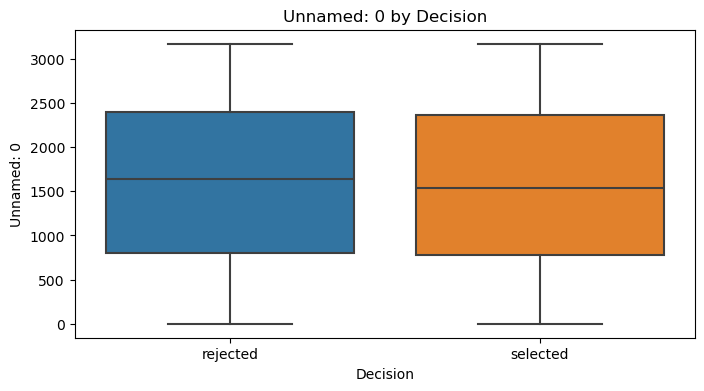

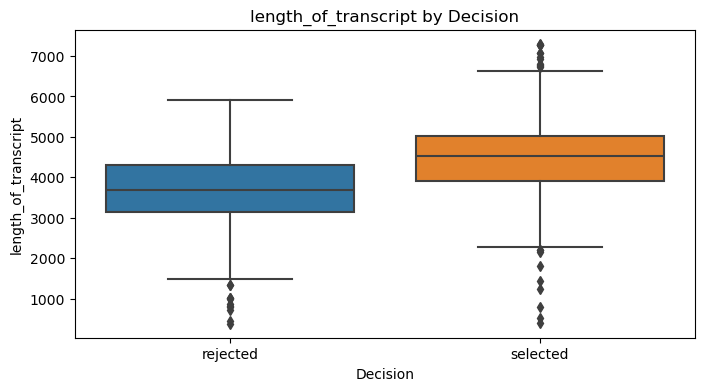

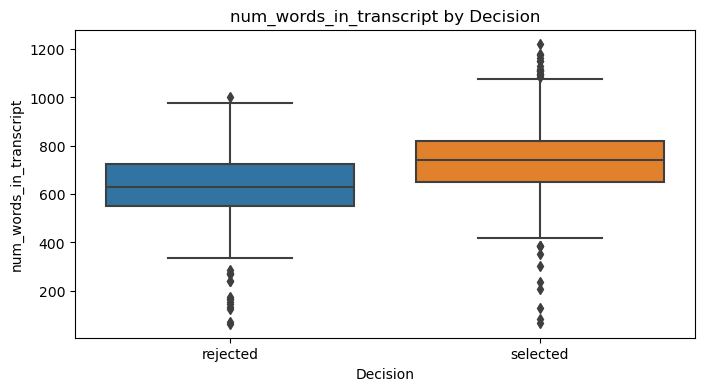

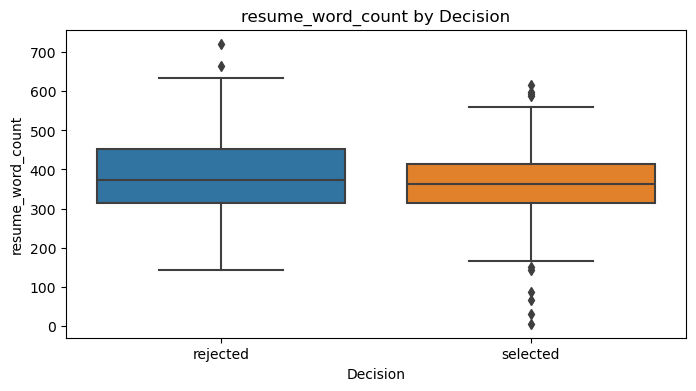

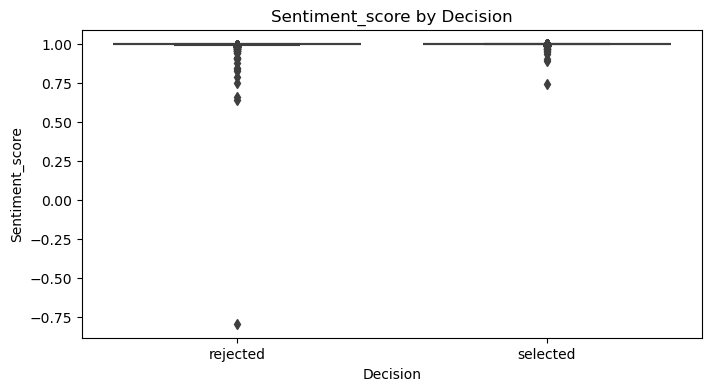

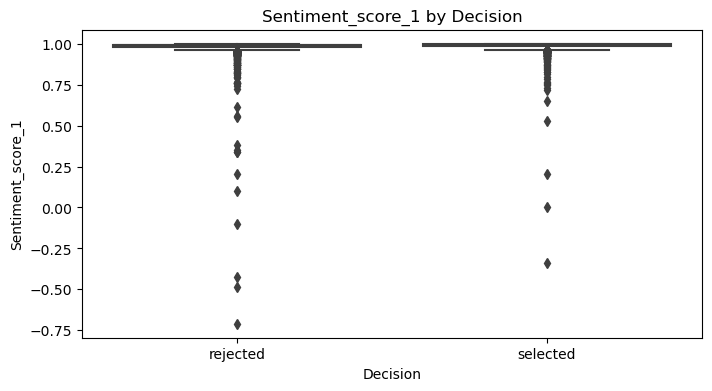

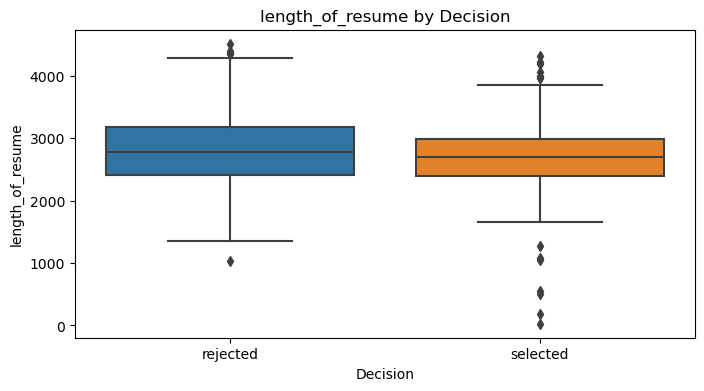

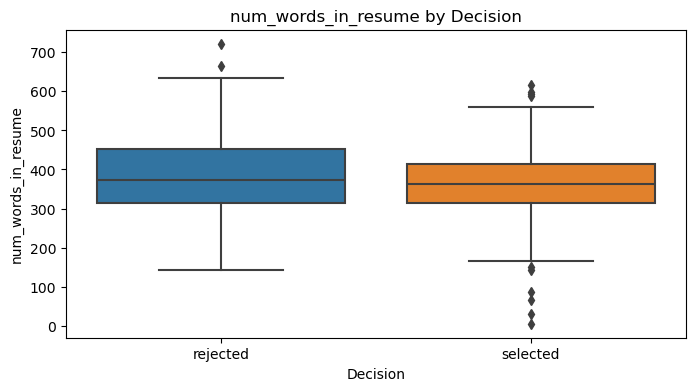

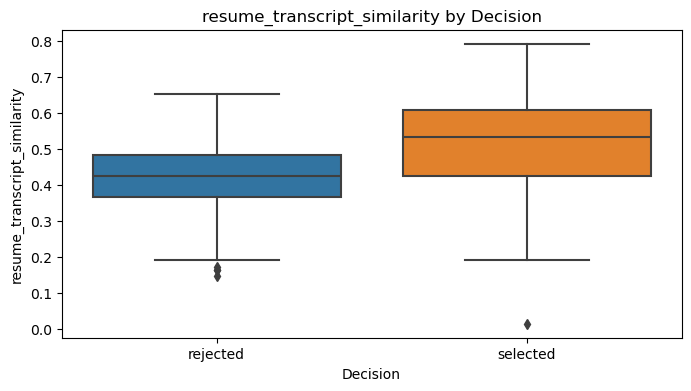

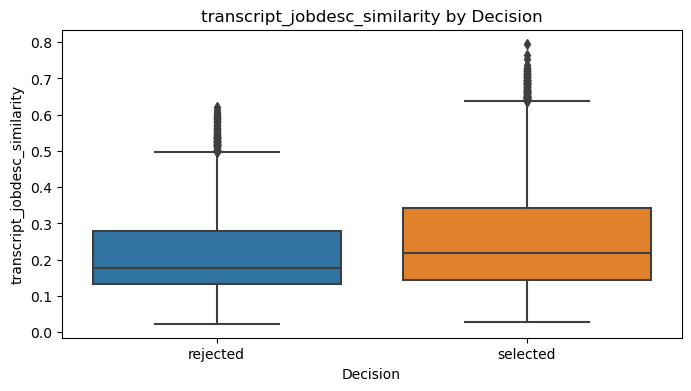

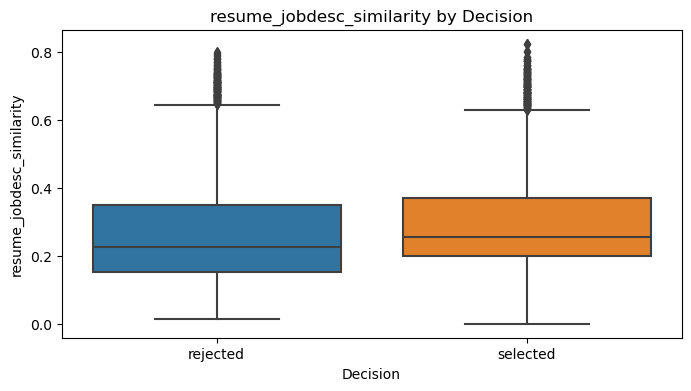

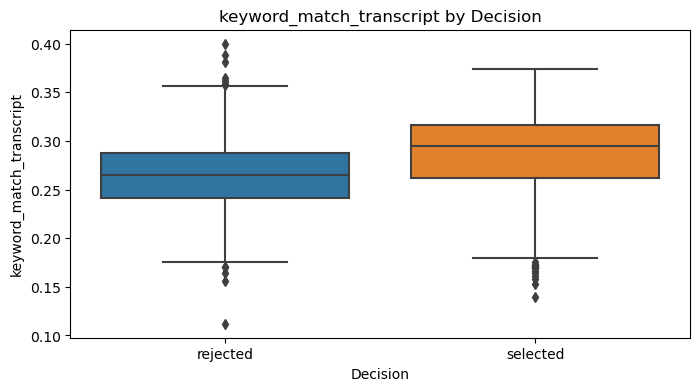

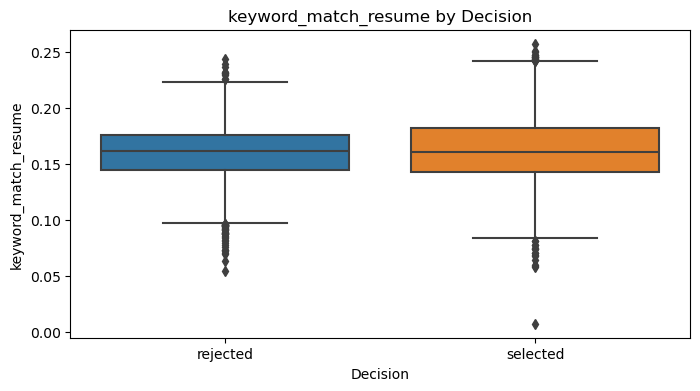

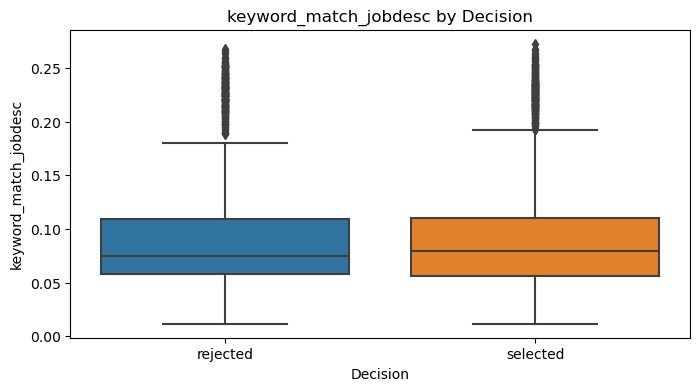

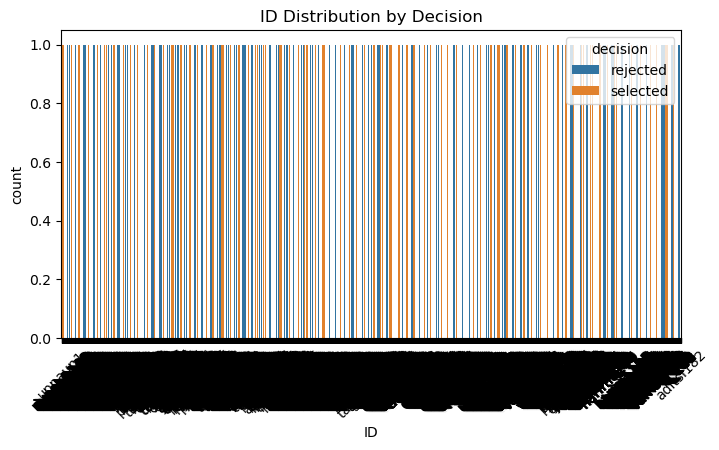

In [ ]:
data=pd.read_excel('dataset12.xlsx')
print("\nBasic Information about the Dataset:\n")
data.info()
print("\nDataset Shape:", data.shape)
print("\nFirst 5 Rows:\n", data.head())
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='decision', y=col)
    plt.title(f'{col} by Decision')
    plt.xlabel('Decision')
    plt.ylabel(col)
    plt.show()
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'decision': 
        plt.figure(figsize=(8, 4))
        sns.countplot(data=data, x=col, hue='decision', order=data[col].value_counts().index)
        plt.title(f'{col} Distribution by Decision')
        plt.xticks(rotation=45)
        plt.show()
sns.pairplot(data, hue='decision', diag_kind='kde', palette='Set2')
plt.show()
print("\nEDA Visualizations by Decision Complete!")